## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Datasets

In [22]:
df_product = pd.read_csv('/content/product_info.csv')
df_product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [23]:
df_product.shape

(8494, 27)

In [24]:
df_reviews1 = pd.read_csv('/content/reviews_0-250.csv', low_memory=False)
df_reviews2 = pd.read_csv('/content/reviews_250-500.csv', low_memory=False)
df_reviews3 = pd.read_csv('/content/reviews_500-750.csv', low_memory=False)
df_reviews4 = pd.read_csv('/content/reviews_750-1250.csv', low_memory=False)
df_reviews5 = pd.read_csv('/content/reviews_1250-end.csv', low_memory=False)


## Data Cleaning and Data Preprocessing

In [25]:
total_reviews = pd.concat([df_reviews1, df_reviews2, df_reviews3, df_reviews4, df_reviews5], axis=0)
total_reviews.reset_index(drop=True, inplace=True)
total_reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2/1/2023,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,3/21/2023,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,3/21/2023,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,3/20/2023,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,3/20/2023,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [26]:
total_reviews.shape

(1094411, 18)

In [27]:
df_product['product_id'].nunique()

8494

In [28]:
total_reviews['product_id'].nunique()

2351

In [29]:
df_merge = pd.merge(df_product, total_reviews, on='product_id', how='inner')
df_merge.head()

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_x,reviews,size,variation_type,variation_value,...,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_y,brand_name_y,price_usd_y
0,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,2/9/2023,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
1,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,1/13/2023,This cream feels so silky and luxurious! I fee...,Luxurious treat I use nightly.,NaN,NaN,NaN,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
2,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,12/9/2022,This is the fourth Algenist product I’ve gotte...,Algenist doesn't miss,NaN,NaN,combination,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
3,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,12/1/2022,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
4,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,11/7/2022,I don’t like the smell. It pills on your skin ...,NaN,fair,green,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0


In [30]:
df_merge.shape

(1094411, 44)

In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   product_id                1094411 non-null  object 
 1   product_name_x            1094411 non-null  object 
 2   brand_id                  1094411 non-null  int64  
 3   brand_name_x              1094411 non-null  object 
 4   loves_count               1094411 non-null  int64  
 5   rating_x                  1094411 non-null  float64
 6   reviews                   1094411 non-null  float64
 7   size                      1051048 non-null  object 
 8   variation_type            1042956 non-null  object 
 9   variation_value           1030978 non-null  object 
 10  variation_desc            8283 non-null     object 
 11  ingredients               1072386 non-null  object 
 12  price_usd_x               1094411 non-null  float64
 13  value_price_usd           3

In [32]:
df_merge['product_id'].nunique()

2351

In [33]:
df_merge['product_id'].value_counts().sum()

1094411

In [34]:
df_merge.columns

Index(['product_id', 'product_name_x', 'brand_id', 'brand_name_x',
       'loves_count', 'rating_x', 'reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'price_usd_x',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category',
       'child_count', 'child_max_price', 'child_min_price', 'author_id',
       'rating_y', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'eye_color', 'skin_type', 'hair_color', 'product_name_y',
       'brand_name_y', 'price_usd_y'],
      dtype='object')

In [35]:
df_merge = df_merge.drop(['product_name_y','brand_name_y','price_usd_y','rating_y'],axis=1)
df_merge = df_merge.rename(columns={'product_name_x': 'product_name', 'brand_name_x': 'brand_name', 'price_usd_x': 'price_usd', 'rating_x': 'rating'})
df_merge.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'author_id', 'is_recommended',
       'helpfulness', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color'],
      dtype='object')

In [36]:
df_merge.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
brand_name,0
loves_count,0
rating,0
reviews,0
size,43363
variation_type,51455
variation_value,63433


In [37]:
df_merge['brand_name'].nunique()

142

In [38]:
df_merge = df_merge.drop(['value_price_usd','sale_price_usd','variation_desc','variation_value'],axis=1)
df_merge[['child_max_price', 'child_min_price']] = df_merge[['child_max_price', 'child_min_price']].fillna(0)
df_merge['rating']=df_merge['rating'].fillna(0)
df_merge['reviews']=df_merge['reviews'].fillna(0)
df_merge['helpfulness']=df_merge['helpfulness'].fillna(0)
df_merge['submission_time'] = pd.to_datetime(df_merge['submission_time'])
df_merge['year'] = df_merge['submission_time'].dt.year
df_merge['tertiary_category'] = df_merge['tertiary_category'].fillna(df_merge['secondary_category'])
df_merge.drop(['submission_time'], axis=1, inplace=True)
df_merge['skin_tone'] = df_merge['skin_tone'].fillna('Unknown')
df_merge['skin_type'] = df_merge['skin_type'].fillna('Unknown')
df_merge['eye_color'] = df_merge['eye_color'].fillna('Unknown')
df_merge['hair_color'] = df_merge['hair_color'].fillna('Unknown')

In [39]:
df_merge.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
brand_name,0
loves_count,0
rating,0
reviews,0
size,43363
variation_type,51455
ingredients,22025


In [40]:
df_merge.dropna(inplace=True)
df_merge.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
brand_name,0
loves_count,0
rating,0
reviews,0
size,0
variation_type,0
ingredients,0


In [41]:
df_merge.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,year
0,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2,0,2,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,2023
1,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,3,2,1,This cream feels so silky and luxurious! I fee...,Luxurious treat I use nightly.,Unknown,Unknown,Unknown,Unknown,2023
2,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,5,0,5,This is the fourth Algenist product I’ve gotte...,Algenist doesn't miss,Unknown,Unknown,combination,Unknown,2022
3,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,5,1,4,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,2022
5,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,5,0,5,Feels thick but it doesn’t break out my sensit...,Thick moisturizer/no breakouts/sensitive skin,fair,Unknown,dry,black,2022


In [42]:
df_merge.shape

(548040, 36)

In [43]:
df_merge['product_id'].nunique()

1621

## Splitting the 5% of Original data for unseen data to test the models in the end

In [44]:
sample_size = int(0.05 * len(df_merge))

# Randomly sample 5% of the data
unseen_data = df_merge.sample(n=sample_size, random_state=42)

# Remove the sampled data from the original dataframe to create the training set
df_merge = df_merge.drop(unseen_data.index)
print("Training data shape:", df_merge.shape)
print("Unseen data shape:", unseen_data.shape)

Training data shape: (520638, 36)
Unseen data shape: (27402, 36)


In [45]:
unseen_data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,year
759910,P203616,Glycol Lactic Radiance Renewal Mask,5857,REN Clean Skincare,58212,4.4022,1283.0,1.7 oz/ 50 mL,Size,"['Aqua (Water), Glycerin, Polysorbate 60, Leci...",...,0,0,0,Gentle tingling lets you know it’s working.Ski...,it works,lightMedium,brown,dry,blonde,2019
182140,P454936,Mini Hyaluronic Serum,6302,Dr. Barbara Sturm,4691,3.9386,879.0,0.33 oz/ 10 mL,Size,"['Water, Butylene Glycol, Lactobacillus/Portul...",...,0,0,0,I love it! I would totally recommend it. I hav...,Love it!,Unknown,Unknown,Unknown,Unknown,2023
470251,P431180,Self Tanning Bronzing Face Drops,8008,Isle of Paradise,209716,3.9547,2849.0,1.01 oz/ 30 mL,Color,"['Water, Dihydroxyacetone, Alcohol Denat. (SD ...",...,5,1,4,These drops are amazing! Just 2 drops mixed wi...,"LOVE, LOVE, LOVE!",lightMedium,green,dry,blonde,2022
444727,P461451,Abeille Royale Anti-Aging Fortifying Lotion Toner,1132,GUERLAIN,6480,4.2566,834.0,5.0 oz/ 150 mL,Size,"['Aqua (Water), Propanediol, Glycerin, Butylen...",...,0,0,0,This is my new Holy Grail product in my skinca...,Holy Grail,light,green,combination,brown,2020
67825,P94421,Vinoperfect Radiance Dark Spot Serum Vitamin C...,4171,Caudalie,166423,4.2442,2911.0,1 oz/ 30 mL,Size,"['Aqua/Water/Eau, Butylene Glycol, Glycerin, C...",...,0,0,0,I was not the biggest fan of this product. I t...,unsure,Unknown,Unknown,Unknown,Unknown,2017


## Data Visualization

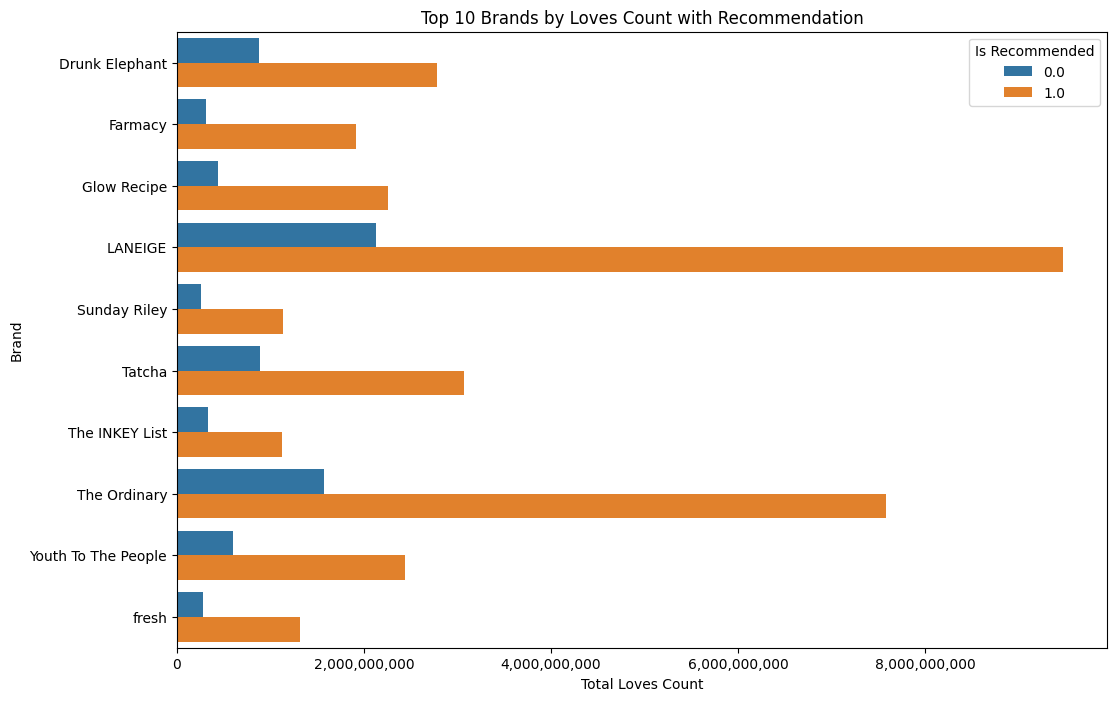

In [46]:
import matplotlib.ticker as ticker
# Find the top 10 brands by total loves_count
top_brands = df_merge.groupby('brand_name')['loves_count'].sum().nlargest(10).index
df_top_brands = df_merge[df_merge['brand_name'].isin(top_brands)]

# Group by brand and is_recommended, then sum the loves_count
top_brands_recommendation = df_top_brands.groupby(['brand_name', 'is_recommended'])['loves_count'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='loves_count', y='brand_name', hue='is_recommended', data=top_brands_recommendation)
plt.title('Top 10 Brands by Loves Count with Recommendation')
plt.xlabel('Total Loves Count')
plt.ylabel('Brand')
plt.legend(title='Is Recommended')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


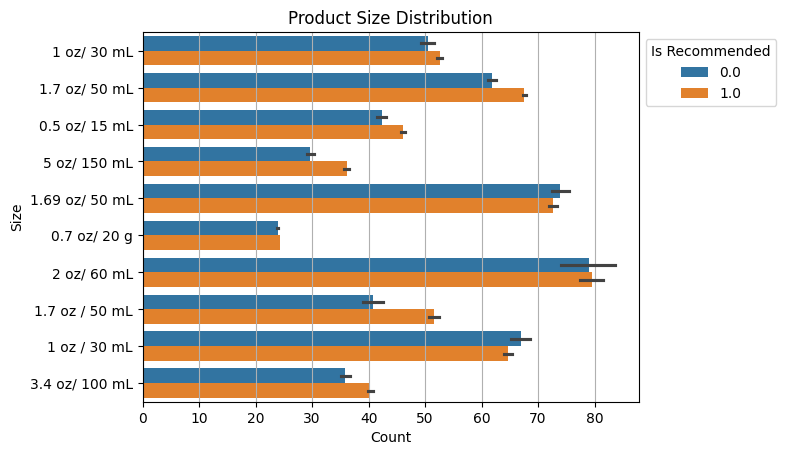

In [47]:
sns.barplot(x='price_usd',y='size', hue='is_recommended', data=df_merge, order=df_merge['size'].value_counts().nlargest(10).index)
plt.title('Product Size Distribution')
plt.xlabel('Count')
plt.ylabel('Size')
plt.legend(title='Is Recommended', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.show()


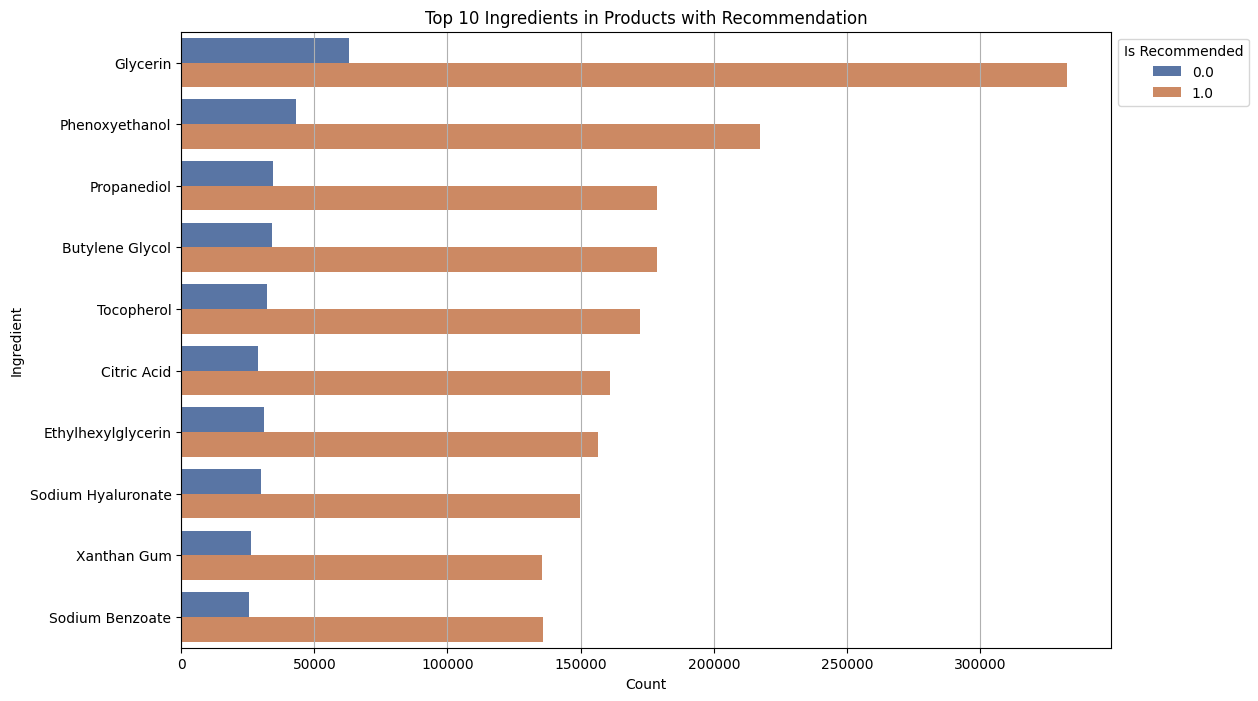

In [48]:
from collections import Counter

# Clean the ingredients column by removing brackets and splitting by commas
df_merge['cleaned_ingredients'] = df_merge['ingredients'].dropna().str.replace(r"[\[\]']", "", regex=True).str.split(',')

# Flatten the list of ingredients and keep track of 'is_recommended'
ingredients_exploded = df_merge[['cleaned_ingredients', 'is_recommended']].explode('cleaned_ingredients')
ingredients_exploded['cleaned_ingredients'] = ingredients_exploded['cleaned_ingredients'].str.strip()

# Count the occurrences of each ingredient grouped by 'is_recommended'
ingredient_counts = ingredients_exploded.groupby(['cleaned_ingredients', 'is_recommended']).size().unstack(fill_value=0)

# Get the top 10 most common ingredients
top_ingredients = ingredient_counts.sum(axis=1).nlargest(10).index

# Filter the ingredient counts to include only the top ingredients
top_ingredient_counts = ingredient_counts.loc[top_ingredients]


# Convert the ingredient counts DataFrame to long format for use with Seaborn
top_ingredient_counts_long = top_ingredient_counts.reset_index().melt(id_vars='cleaned_ingredients', var_name='is_recommended', value_name='count')

# Create a Seaborn bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_ingredient_counts_long, x='count', y='cleaned_ingredients', hue='is_recommended', palette=['#4c72b0', '#dd8452'])

plt.title('Top 10 Ingredients in Products with Recommendation')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.legend(title='Is Recommended', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.show()


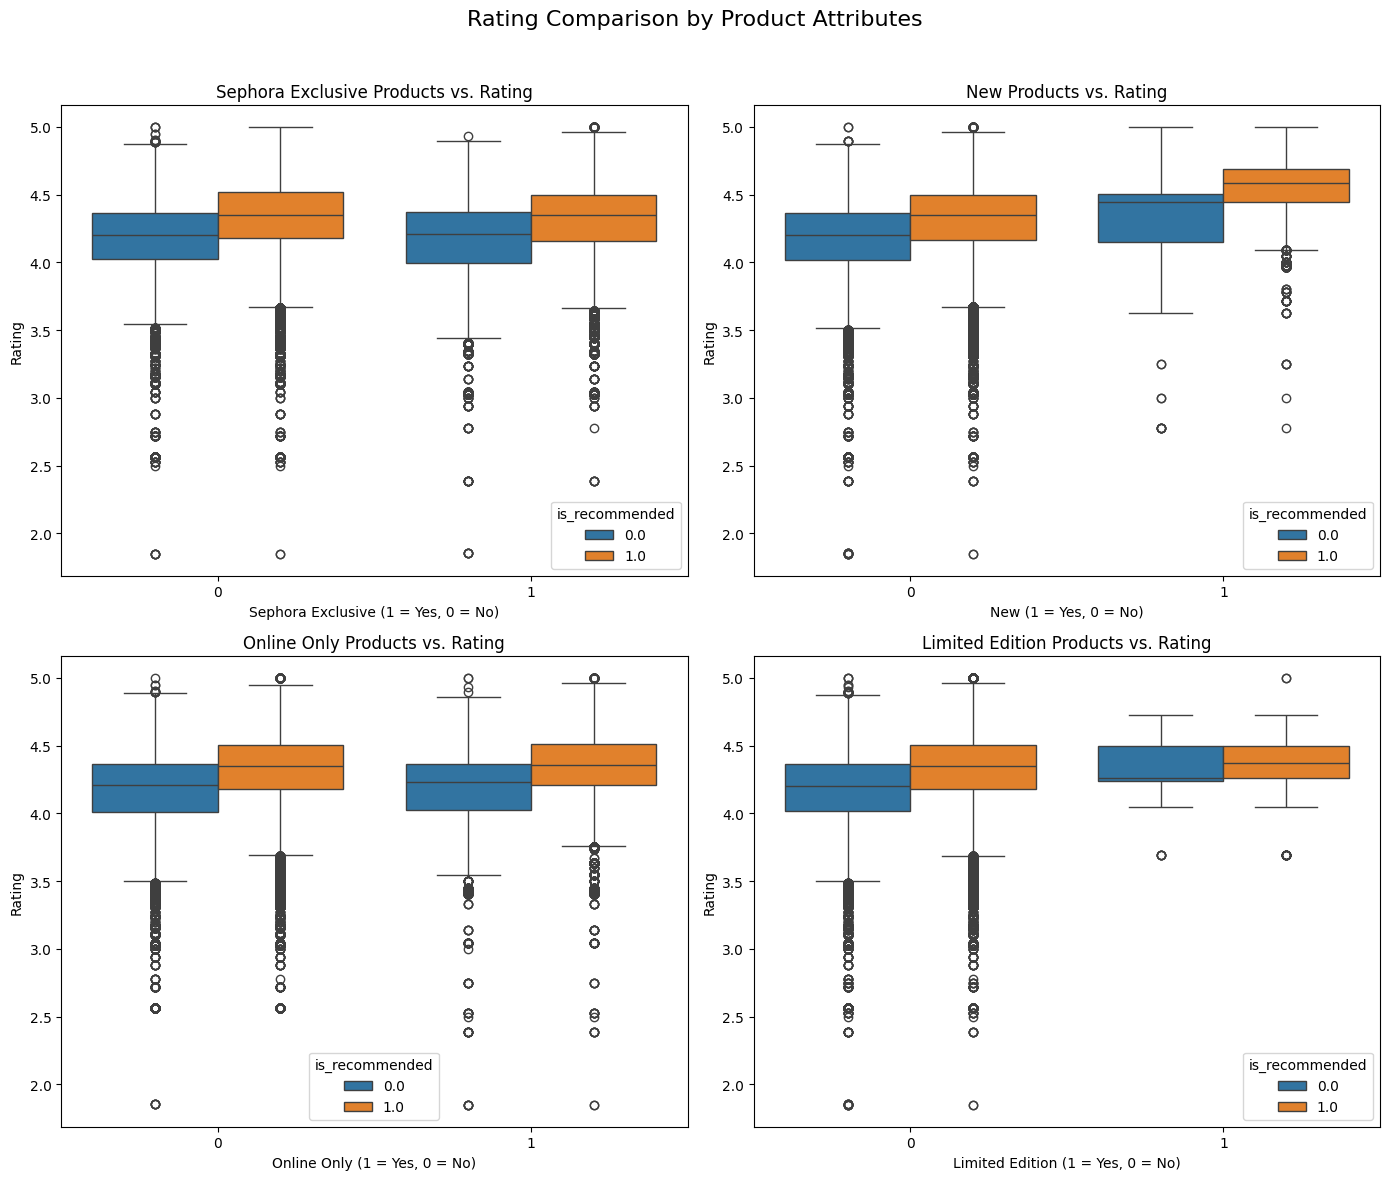

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Rating Comparison by Product Attributes', fontsize=16)

# 1. Sephora Exclusive Products vs. Rating
sns.boxplot(x='sephora_exclusive', y='rating',hue='is_recommended', data=df_merge, ax=axs[0, 0])
axs[0, 0].set_title('Sephora Exclusive Products vs. Rating')
axs[0, 0].set_xlabel('Sephora Exclusive (1 = Yes, 0 = No)')
axs[0, 0].set_ylabel('Rating')

# 2. New Products vs. Rating
sns.boxplot(x='new', y='rating',hue='is_recommended', data=df_merge, ax=axs[0, 1])
axs[0, 1].set_title('New Products vs. Rating')
axs[0, 1].set_xlabel('New (1 = Yes, 0 = No)')
axs[0, 1].set_ylabel('Rating')

# 3. Online Only Products vs. Rating
sns.boxplot(x='online_only', y='rating',hue='is_recommended', data=df_merge, ax=axs[1, 0])
axs[1, 0].set_title('Online Only Products vs. Rating')
axs[1, 0].set_xlabel('Online Only (1 = Yes, 0 = No)')
axs[1, 0].set_ylabel('Rating')

# 4. Limited Edition Products vs. Rating
sns.boxplot(x='limited_edition', y='rating',hue='is_recommended', data=df_merge, ax=axs[1, 1])
axs[1, 1].set_title('Limited Edition Products vs. Rating')
axs[1, 1].set_xlabel('Limited Edition (1 = Yes, 0 = No)')
axs[1, 1].set_ylabel('Rating')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


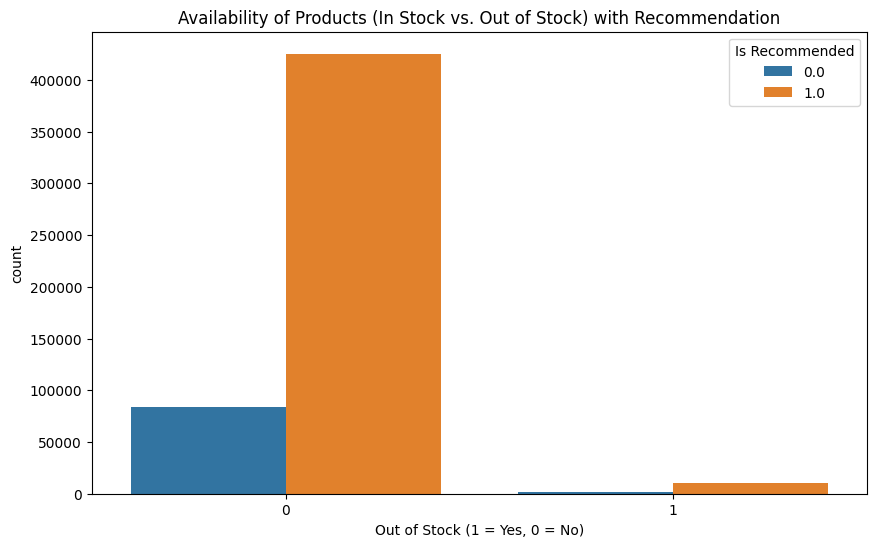

In [50]:
# Create a grouped bar plot for Availability of Products (In Stock vs. Out of Stock) with Is Recommended
plt.figure(figsize=(10, 6))
sns.countplot(x='out_of_stock', hue='is_recommended', data=df_merge)
plt.title('Availability of Products (In Stock vs. Out of Stock) with Recommendation')
plt.xlabel('Out of Stock (1 = Yes, 0 = No)')
plt.ylabel('count')
plt.legend(title='Is Recommended')
plt.show()

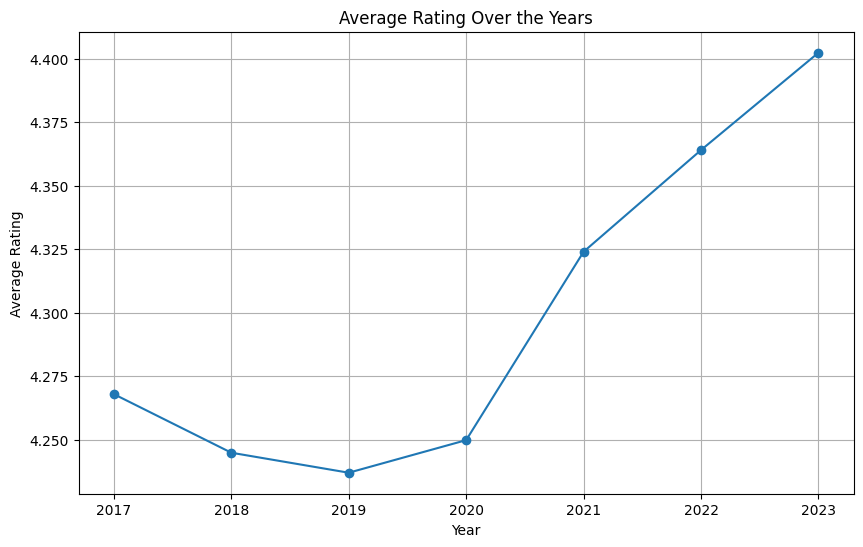

In [51]:
yearly_rating = df_merge.groupby('year')['rating'].mean().reset_index()

# Plot the average rating over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_rating['year'], yearly_rating['rating'], marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

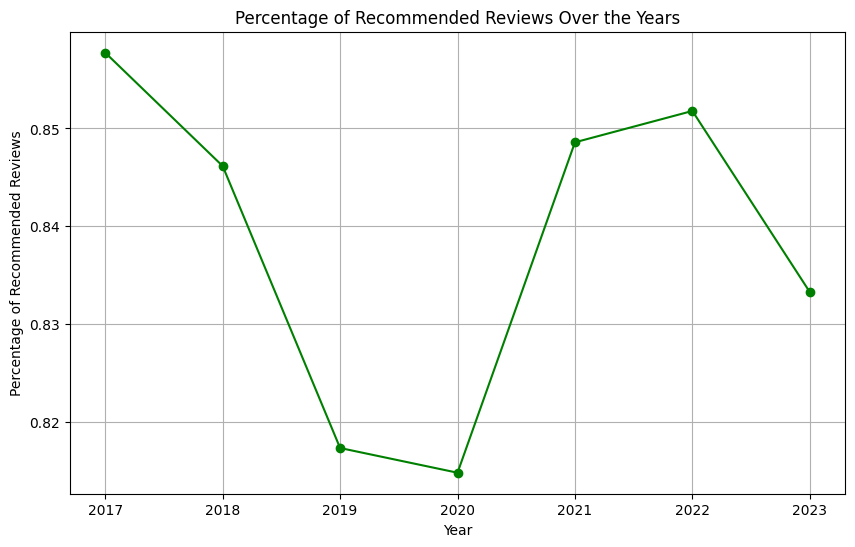

In [52]:
# Group by year and calculate the percentage of recommended reviews
yearly_recommendation = df_merge.groupby('year')['is_recommended'].mean().reset_index()

# Plot the percentage of recommended reviews over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_recommendation['year'], yearly_recommendation['is_recommended'], marker='o', color='green')
plt.title('Percentage of Recommended Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Recommended Reviews')
plt.grid(True)
plt.show()

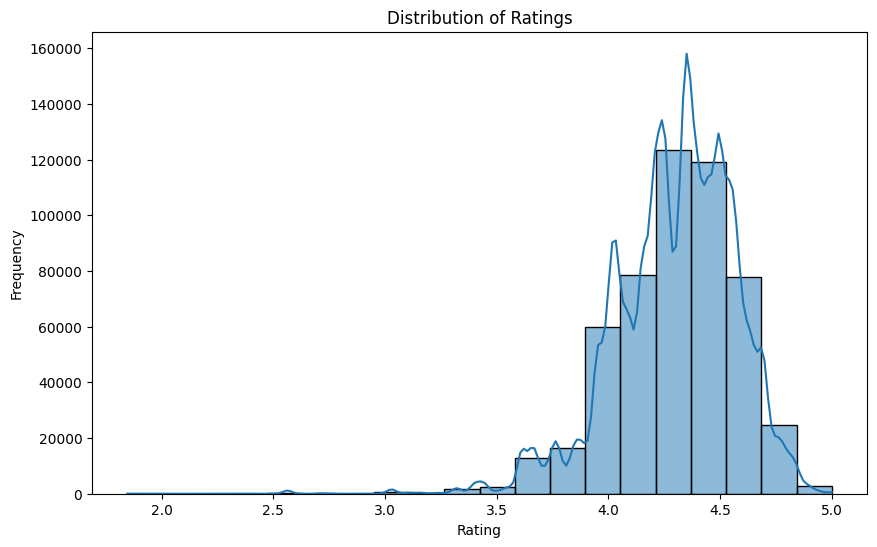

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merge['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


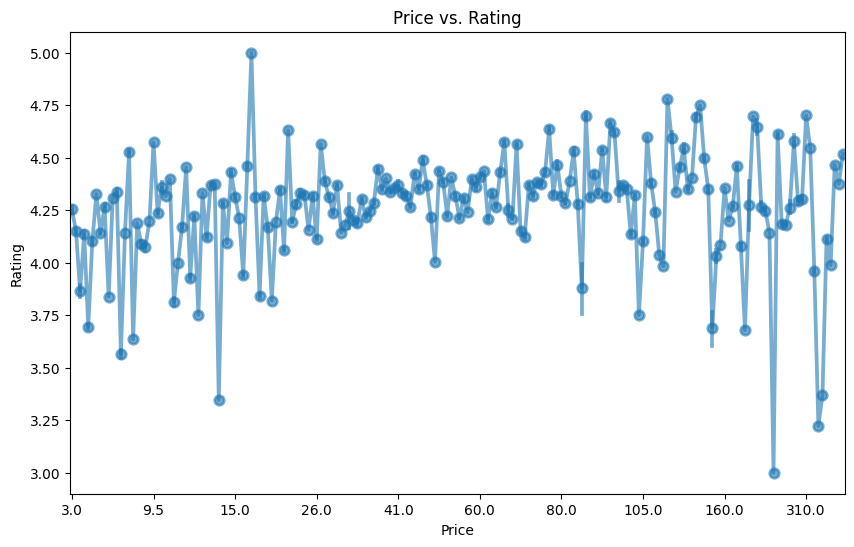

In [54]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10, 6))
sns.pointplot(x=df_merge['price_usd'], y=df_merge['rating'], alpha=0.6)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


## Model Implementation without Text Analysis

In [27]:
numerical_columns = df_merge.select_dtypes(include=['int32','int64','float64'])
numerical_columns.head()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,year
0,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,1.000000,2,0,2,2023
1,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.333333,3,2,1,2023
3,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.800000,5,1,4,2022
5,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,1.000000,5,0,5,2022
7,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.333333,15,10,5,2022


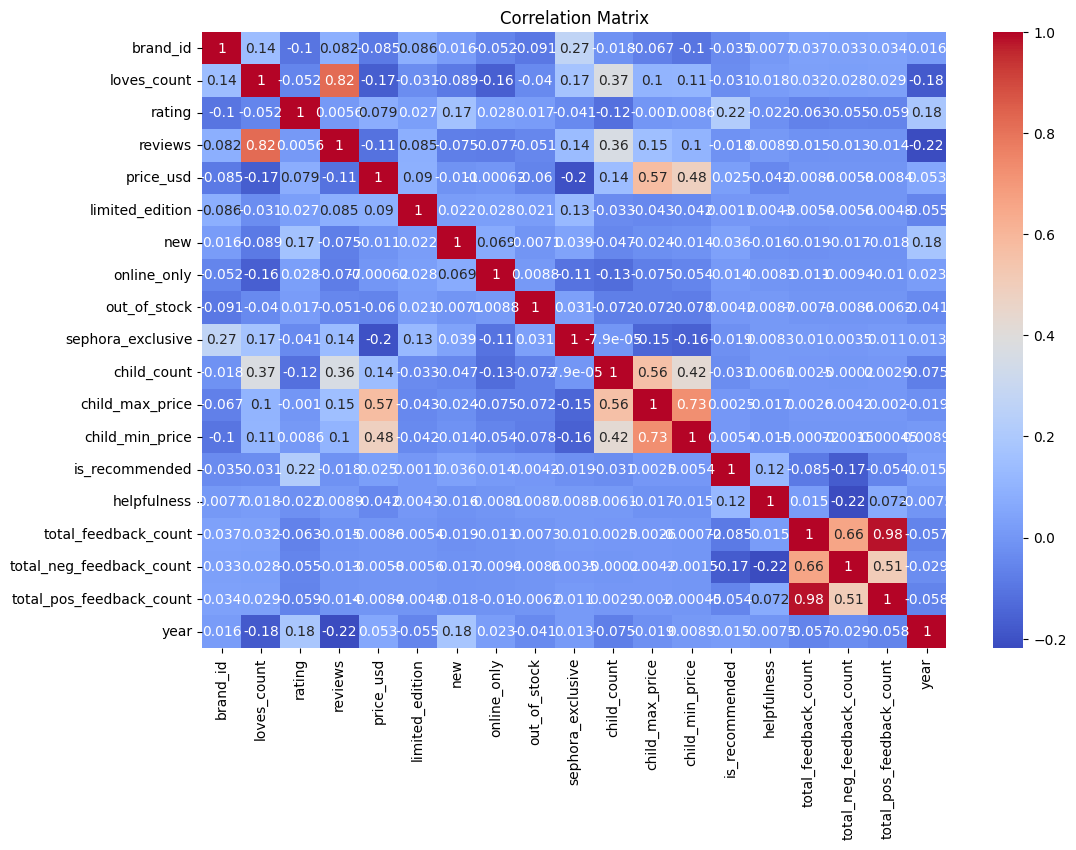

In [28]:
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
to_drop = ['total_feedback_count']
df_reduced = numerical_columns.drop(columns=to_drop)
df_reduced.head()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price,is_recommended,helpfulness,total_neg_feedback_count,total_pos_feedback_count,year
0,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,1.000000,0,2,2023
1,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.333333,2,1,2023
3,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.800000,1,4,2022
5,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,1.000000,0,5,2022
7,6018,33910,4.5413,1321.0,98.0,0,0,0,0,1,0,0.0,0.0,1.0,0.333333,10,5,2022


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


X = df_reduced.drop(columns=['is_recommended'])
y = df_reduced['is_recommended']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    return {
        'Validation Accuracy': val_accuracy,
        'Validation Precision': val_precision,
        'Validation Recall': val_recall,
        'Validation F1 Score': val_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg_results = evaluate_model(log_reg, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

print("Logistic Regression Results:")
for metric, score in log_reg_results.items():
    print(f"{metric}: {score:.2f}")

# 2. Naive Bayes (GaussianNB)
nb = GaussianNB()
nb_results = evaluate_model(nb, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

print("\nNaive Bayes Results:")
for metric, score in nb_results.items():
    print(f"{metric}: {score:.2f}")

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf_results = evaluate_model(rf, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

print("\nRandom Forest Results:")
for metric, score in rf_results.items():
    print(f"{metric}: {score:.2f}")

# 4. Neural Network (MLPClassifier)
mlp = MLPClassifier(max_iter=2000, random_state=42)
mlp_results = evaluate_model(mlp, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

print("\nNeural Network Results:")
for metric, score in mlp_results.items():
    print(f"{metric}: {score:.2f}")


Logistic Regression Results:
Validation Accuracy: 0.84
Validation Precision: 0.85
Validation Recall: 0.99
Validation F1 Score: 0.91
Test Accuracy: 0.84
Test Precision: 0.85
Test Recall: 0.99
Test F1 Score: 0.91

Naive Bayes Results:
Validation Accuracy: 0.81
Validation Precision: 0.86
Validation Recall: 0.93
Validation F1 Score: 0.89
Test Accuracy: 0.81
Test Precision: 0.85
Test Recall: 0.93
Test F1 Score: 0.89

Random Forest Results:
Validation Accuracy: 0.84
Validation Precision: 0.87
Validation Recall: 0.95
Validation F1 Score: 0.91
Test Accuracy: 0.84
Test Precision: 0.87
Test Recall: 0.95
Test F1 Score: 0.91

Neural Network Results:
Validation Accuracy: 0.85
Validation Precision: 0.87
Validation Recall: 0.98
Validation F1 Score: 0.92
Test Accuracy: 0.85
Test Precision: 0.86
Test Recall: 0.98
Test F1 Score: 0.92


## Model Implementation with Text Analysis

In [55]:
!pip install wordcloud

In [56]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk import ne_chunk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [57]:
df_merge['text_data'] = df_merge['brand_name']+ ' ' + df_merge['review_text'] + ' ' + df_merge['review_title']+ ' ' + df_merge['primary_category']+ ' ' + df_merge['eye_color']+ ' ' + df_merge['hair_color']+ ' ' + df_merge['skin_tone']+ ' ' + df_merge['skin_type']+ ' ' + df_merge['secondary_category']+ ' ' + df_merge['tertiary_category'].fillna('')
df_merge['is_recommended'] = df_merge['is_recommended'].astype(int)
df_text = df_merge[['text_data','is_recommended']]

In [58]:
df_text.head()

,text_data,is_recommended
0,"Algenist Ever since I bought this, I noticed t...",1
1,Algenist This cream feels so silky and luxurio...,1
3,Algenist I’ve been using this for 2 months now...,1
5,Algenist Feels thick but it doesn’t break out ...,1
7,Algenist Great product. It is so moisturizing....,1


In [59]:
df_text['is_recommended'].value_counts()

,count
is_recommended,
1,435219
0,85419


In [60]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

text_data = df_text['text_data'].apply(clean_text)
print(text_data)

0          algenist ever since bought noticed skin softer...
1          algenist cream feel silky luxurious feel like ...
3          algenist ive using month cant tell enough amaz...
5          algenist feel thick doesnt break sensitive occ...
7          algenist great product moisturizing however hu...
                                 ...                        
1094380    youth people ive using product day couldnt sur...
1094381    youth people consistency lotion really like ea...
1094398    youth people lately ive breaking forehead shav...
1094399    youth people mild formula want gentle would pe...
1094400    youth people reactive sensitive skin exfoliato...
Name: text_data, Length: 520638, dtype: object


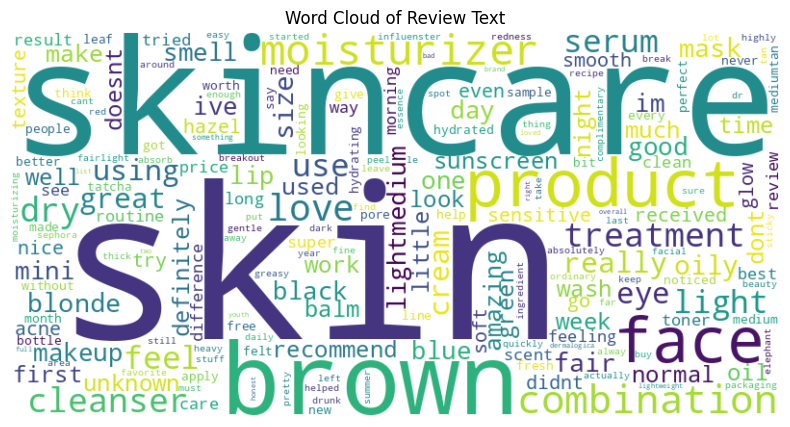

In [40]:
from wordcloud import WordCloud
from collections import Counter
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,  # Avoid repeated bigrams/phrases
).generate(' '.join(text_data))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

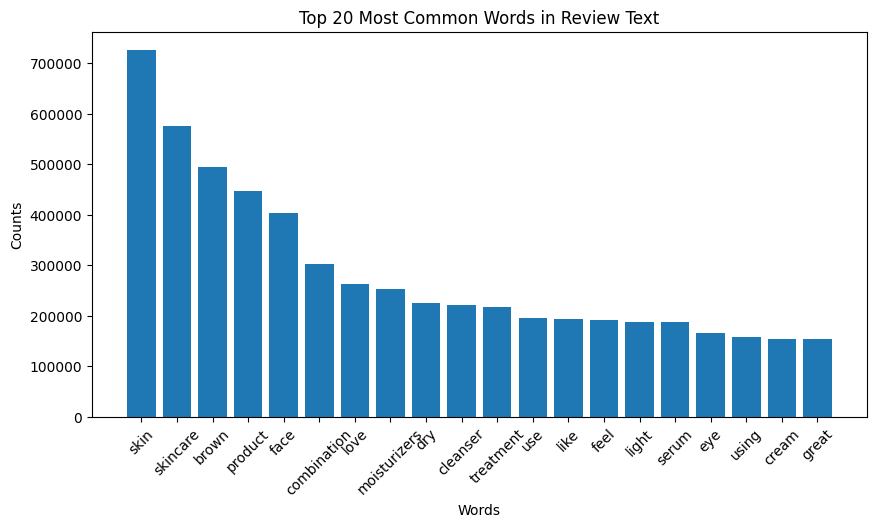

In [ ]:
# Frequency Distribution of the top 20 words
all_words = ' '.join(text_data).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Most Common Words in Review Text')
plt.xticks(rotation=45)
plt.show()

## Logistic Regression

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)
y = df_text['is_recommended'].astype(int)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# Train the model
LR_model1 = LogisticRegression(max_iter=1000)
LR_model1.fit(X_train, y_train)

joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(LR_model1, 'LR_model1.pkl')
# Predict on the validation and test sets
y_val_pred = LR_model1.predict(X_val)
y_test_pred = LR_model1.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Validation Precision: {val_precision:.2f}')
print(f'Validation Recall: {val_recall:.2f}')
print(f'Validation F1 Score: {val_f1:.2f}')

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')


Validation Accuracy: 0.94
Validation Precision: 0.95
Validation Recall: 0.98
Validation F1 Score: 0.96
Test Accuracy: 0.94
Test Precision: 0.95
Test Recall: 0.98
Test F1 Score: 0.96


##  Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

joblib.dump(vectorizer, 'vectorizer.pk2')
joblib.dump(nb_model, 'nb_model.pk2')
# Predict on the validation and test sets
y_val_pred = nb_model.predict(X_val)
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("Naive Bayes Validation Results:")
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Validation Precision: {val_precision:.2f}')
print(f'Validation Recall: {val_recall:.2f}')
print(f'Validation F1 Score: {val_f1:.2f}')

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nNaive Bayes Test Results:")
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')


Naive Bayes Validation Results:
Validation Accuracy: 0.85
Validation Precision: 0.85
Validation Recall: 1.00
Validation F1 Score: 0.92

Naive Bayes Test Results:
Test Accuracy: 0.85
Test Precision: 0.85
Test Recall: 1.00
Test F1 Score: 0.92


##Choosing the number of words to select

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer with a starting point
tokenizer = Tokenizer(num_words=20000)

# Fit tokenizer on your text data
tokenizer.fit_on_texts(text_data)

# Explore the tokenizer
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

# You can also check the coverage
total_words = sum([len(seq) for seq in tokenizer.texts_to_sequences(text_data)])
top_words_coverage = sum([freq for word, freq in tokenizer.word_counts.items() if tokenizer.word_index[word] <= 10000])
coverage_ratio = top_words_coverage / total_words
print(f"Coverage with top 20,000 words: {coverage_ratio:.2%}")


Found 108330 unique tokens.
Coverage with top 20,000 words: 99.54%


##Choosing the maximum length

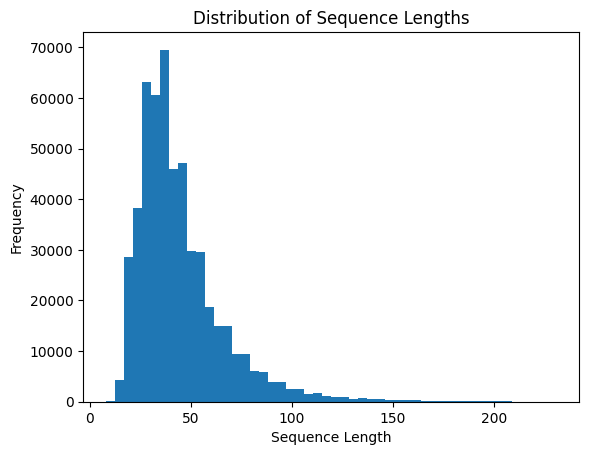

Max length: 231
Mean length: 44.73
95th percentile: 87.0


In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(text_data)
X = tokenizer.texts_to_sequences(text_data)
sequence_lengths = [len(seq) for seq in X]

# Plotting the distribution of sequence lengths
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

# Calculate statistics
max_length = max(sequence_lengths)
mean_length = sum(sequence_lengths) / len(sequence_lengths)
percentile_95 = np.percentile(sequence_lengths, 95)

print(f"Max length: {max_length}")
print(f"Mean length: {mean_length:.2f}")
print(f"95th percentile: {percentile_95}")

 ## Feedforward Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
2734/2734 ━━━━━━━━━━━━━━━━━━━━ 1041s 380ms/step - accuracy: 0.9115 - loss: 0.2286 - val_accuracy: 0.9398 - val_loss: 0.1525
Epoch 2/30
2734/2734 ━━━━━━━━━━━━━━━━━━━━ 912s 333ms/step - accuracy: 0.9541 - loss: 0.1245 - val_accuracy: 0.9366 - val_loss: 0.1608
Epoch 3/30
2734/2734 ━━━━━━━━━━━━━━━━━━━━ 886s 324ms/step - accuracy: 0.9764 - loss: 0.0666 - val_accuracy: 0.9354 - val_loss: 0.1924
Epoch 4/30
2734/2734 ━━━━━━━━━━━━━━━━━━━━ 1065s 389ms/step - accuracy: 0.9868 - loss: 0.0373 - val_accuracy: 0.9359 - val_loss: 0.2768


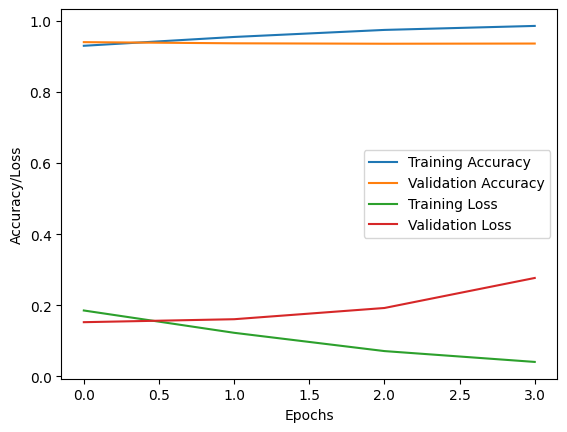

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(text_data)
X = tokenizer.texts_to_sequences(text_data)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved index 0

# Padding sequences to ensure uniform input length
maxlen = 200
X = pad_sequences(X, padding='post', maxlen=maxlen)
y = df_text['is_recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Neural Network model
NN_model = Sequential()
NN_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
#model.add(Dropout(0.5))
NN_model.add(Flatten())  # Flatten the output from the Embedding layer
NN_model.add(Dense(64, activation='relu'))  # Hidden layer
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with a large number of epochs
history = NN_model.fit(X_train, y_train, epochs=30, batch_size=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Plotting the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [43]:
NN_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.3)
y_pred = (NN_model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/2
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 1106s 369ms/step - accuracy: 0.9067 - loss: 0.2382 - val_accuracy: 0.9405 - val_loss: 0.1545
Epoch 2/2
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 1153s 366ms/step - accuracy: 0.9538 - loss: 0.1231 - val_accuracy: 0.9385 - val_loss: 0.1629
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step
Accuracy: 0.94
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


## LSTM Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 673s 262ms/step - accuracy: 0.8899 - loss: 0.2921 - val_accuracy: 0.9353 - val_loss: 0.1679
Epoch 2/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 594s 228ms/step - accuracy: 0.9351 - loss: 0.1748 - val_accuracy: 0.9378 - val_loss: 0.1614
Epoch 3/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 646s 237ms/step - accuracy: 0.9406 - loss: 0.1573 - val_accuracy: 0.9401 - val_loss: 0.1550
Epoch 4/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 586s 230ms/step - accuracy: 0.9436 - loss: 0.1494 - val_accuracy: 0.9415 - val_loss: 0.1504
Epoch 5/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 621s 229ms/step - accuracy: 0.9464 - loss: 0.1433 - val_accuracy: 0.9420 - val_loss: 0.1491
Epoch 6/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 585s 229ms/step - accuracy: 0.9468 - loss: 0.1389 - val_accuracy: 0.9428 - val_loss: 0.1501
Epoch 7/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 614s 226ms/step - accuracy: 0.9488 - loss: 0.1345 - val_accuracy: 0.9439 - val_loss: 0.1475
Epoch 8/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 657s 240ms/step - ac

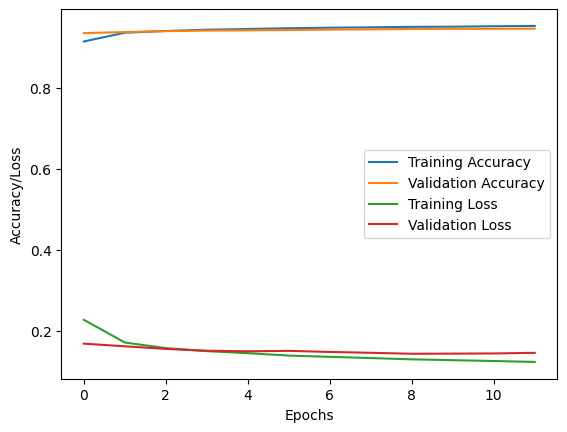

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(text_data)
X_seq = tokenizer.texts_to_sequences(text_data)
X_pad = pad_sequences(X_seq, maxlen=200)
y = df_text['is_recommended']
vocab_size = len(tokenizer.word_index) + 1
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
# Define the model (example with an MLP)
model = Sequential([
    Embedding(vocab_size, 32, input_length=200),
    SpatialDropout1D(0.25),
    LSTM(50, dropout=0.5, recurrent_dropout=0.5),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with a large number of epochs
history = model.fit(X_train, y_train, epochs=30, batch_size=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Plotting the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [44]:
model.fit(X_train, y_train, epochs=13, batch_size=100, validation_split=0.3)
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("LSTM Neural Network:")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 493s 274ms/step - accuracy: 0.8815 - loss: 0.3169 - val_accuracy: 0.9340 - val_loss: 0.1706
Epoch 2/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 498s 279ms/step - accuracy: 0.9335 - loss: 0.1805 - val_accuracy: 0.9378 - val_loss: 0.1613
Epoch 3/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 563s 313ms/step - accuracy: 0.9381 - loss: 0.1662 - val_accuracy: 0.9378 - val_loss: 0.1595
Epoch 4/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 536s 299ms/step - accuracy: 0.9427 - loss: 0.1528 - val_accuracy: 0.9408 - val_loss: 0.1557
Epoch 5/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 534s 299ms/step - accuracy: 0.9439 - loss: 0.1474 - val_accuracy: 0.9415 - val_loss: 0.1499
Epoch 6/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 551s 293ms/step - accuracy: 0.9466 - loss: 0.1415 - val_accuracy: 0.9418 - val_loss: 0.1504
Epoch 7/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 590s 308ms/step - accuracy: 0.9488 - loss: 0.1368 - val_accuracy: 0.9423 - val_loss: 0.1485
Epoch 8/13
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 554s 304ms/step - ac

## Implementing the models for the unseen data

In [45]:
unseen_data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,year
759910,P203616,Glycol Lactic Radiance Renewal Mask,5857,REN Clean Skincare,58212,4.4022,1283.0,1.7 oz/ 50 mL,Size,"['Aqua (Water), Glycerin, Polysorbate 60, Leci...",...,0,0,0,Gentle tingling lets you know it’s working.Ski...,it works,lightMedium,brown,dry,blonde,2019
182140,P454936,Mini Hyaluronic Serum,6302,Dr. Barbara Sturm,4691,3.9386,879.0,0.33 oz/ 10 mL,Size,"['Water, Butylene Glycol, Lactobacillus/Portul...",...,0,0,0,I love it! I would totally recommend it. I hav...,Love it!,Unknown,Unknown,Unknown,Unknown,2023
470251,P431180,Self Tanning Bronzing Face Drops,8008,Isle of Paradise,209716,3.9547,2849.0,1.01 oz/ 30 mL,Color,"['Water, Dihydroxyacetone, Alcohol Denat. (SD ...",...,5,1,4,These drops are amazing! Just 2 drops mixed wi...,"LOVE, LOVE, LOVE!",lightMedium,green,dry,blonde,2022
444727,P461451,Abeille Royale Anti-Aging Fortifying Lotion Toner,1132,GUERLAIN,6480,4.2566,834.0,5.0 oz/ 150 mL,Size,"['Aqua (Water), Propanediol, Glycerin, Butylen...",...,0,0,0,This is my new Holy Grail product in my skinca...,Holy Grail,light,green,combination,brown,2020
67825,P94421,Vinoperfect Radiance Dark Spot Serum Vitamin C...,4171,Caudalie,166423,4.2442,2911.0,1 oz/ 30 mL,Size,"['Aqua/Water/Eau, Butylene Glycol, Glycerin, C...",...,0,0,0,I was not the biggest fan of this product. I t...,unsure,Unknown,Unknown,Unknown,Unknown,2017


##For numerical Data

In [46]:
numeric_columns = unseen_data.select_dtypes(include=['int32','int64','float64'])
numeric_columns.head()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,year
759910,5857,58212,4.4022,1283.0,58.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,0,2019
182140,6302,4691,3.9386,879.0,110.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,0,2023
470251,8008,209716,3.9547,2849.0,32.0,0,0,0,0,1,5,32.0,15.0,1.0,0.800000,5,1,4,2022
444727,1132,6480,4.2566,834.0,85.0,0,0,1,0,0,0,0.0,0.0,1.0,0.767782,0,0,0,2020
67825,4171,166423,4.2442,2911.0,82.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,0,2017


In [47]:
to_drop = ['total_feedback_count']
df_reduced1 = numeric_columns.drop(columns=to_drop)
df_reduced1.head()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price,is_recommended,helpfulness,total_neg_feedback_count,total_pos_feedback_count,year
759910,5857,58212,4.4022,1283.0,58.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,2019
182140,6302,4691,3.9386,879.0,110.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,2023
470251,8008,209716,3.9547,2849.0,32.0,0,0,0,0,1,5,32.0,15.0,1.0,0.800000,1,4,2022
444727,1132,6480,4.2566,834.0,85.0,0,0,1,0,0,0,0.0,0.0,1.0,0.767782,0,0,2020
67825,4171,166423,4.2442,2911.0,82.0,0,0,0,0,0,0,0.0,0.0,1.0,0.767782,0,0,2017


In [49]:
# Prepare unseen_data for numerical models
X_unseen = df_reduced1.drop(columns=['is_recommended'])
scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(X_unseen)  # Apply the same scaling

y_unseen = df_reduced1['is_recommended'].astype(int)


##For Text data

In [50]:
unseen_data['text_data'] = unseen_data['brand_name']+ ' ' + unseen_data['review_text'] + ' ' + unseen_data['review_title']+ ' ' + unseen_data['primary_category']+ ' ' + unseen_data['eye_color']+ ' ' + unseen_data['hair_color']+ ' ' + unseen_data['skin_tone']+ ' ' + unseen_data['skin_type']+ ' ' + unseen_data['secondary_category']+ ' ' + unseen_data['tertiary_category'].fillna('')
unseen_data['is_recommended'] = unseen_data['is_recommended'].astype(int)
df_text1 = unseen_data[['text_data','is_recommended']]

In [51]:
# Prepare unseen_data for text models
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

text_unseen = df_text1['text_data'].apply(clean_text)
print(text_unseen)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_unseen_vectorized = vectorizer.fit_transform(text_unseen)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text_unseen)
X1 = tokenizer.texts_to_sequences(text_unseen)
vocab_size1 = len(tokenizer.word_index) + 1

# Padding sequences to ensure uniform input length
X_text = pad_sequences(X1, maxlen=200)

759910     ren clean skincare gentle tingling let know wo...
182140     dr barbara sturm love would totally recommend ...
470251     isle paradise drop amazing drop mixed moisturi...
444727     guerlain new holy grail product skincare routi...
67825      caudalie biggest fan product thought would tak...
                                 ...                        
203718     dr dennis gross skincare using day great serum...
1044417    ordinary anyone looking product thinking heck ...
196248     dr dennis gross skincare im amazed dead skin u...
1000644    inkey list stuff unreal bad acne scarring year...
720382     peace work great need color option blend perfe...
Name: text_data, Length: 27402, dtype: object


##Predicting with unseen Data points with all the models

In [62]:
vectorizer = joblib.load('vectorizer.pkl')
LR_model1 = joblib.load('LR_model1.pkl')
X_unseen_vectorized = vectorizer.transform(X_unseen)
# Predict with Logistic Regression (text)
LR_model1_predictions = LR_model1.predict(X_unseen_vectorized)

# Predict with Naive Bayes (text)
vectorizer = joblib.load('vectorizer.pk2')
nb_model = joblib.load('nb_model.pk2')
X_unseen_vectorized1 = vectorizer.transform(X_unseen)
nb_model_predictions = nb_model.predict(X_unseen_vectorized1)

In [54]:
# Predict with logistic regression (numerical)
log_reg_predictions = log_reg.predict(X_unseen_scaled)

# Predict with Naive Bayes (numerical)
nb_predictions = nb.predict(X_unseen_scaled)

# Predict with Random Forest (numerical)
rf_predictions = rf.predict(X_unseen_scaled)

# Predict with Neural Network (numerical)
mlp_predictions = mlp.predict(X_unseen_scaled)



# Predict with Neural Network (LSTM) (text)
NN_model_predictions = (NN_model.predict(X_text) > 0.5).astype("int32")

# Predict with LSTM model (text)
lstm_model_predictions = (model.predict(X_text) > 0.5).astype("int32")


857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step
857/857 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step


In [74]:
# Create a new dataframe with the predictions
df_predictions = pd.DataFrame({
    'product_id': unseen_data['product_id'],  # or any unique identifier
    'is_recommended': unseen_data['is_recommended'],
    'log_reg_prediction': log_reg_predictions,
    'nb_prediction': nb_predictions,
    'rf_prediction': rf_predictions,
    'mlp_prediction': mlp_predictions,
    #'LR_model1_prediction': LR_model1_predictions,
    #'nb_model_prediction': nb_model_predictions,
    'NN_model_prediction': NN_model_predictions.flatten(),  # Flatten if needed
    'lstm_model_prediction': lstm_model_predictions.flatten()  # Flatten if needed
})

df_predictions.head()


,product_id,is_recommended,log_reg_prediction,nb_prediction,rf_prediction,mlp_prediction,NN_model_prediction,lstm_model_prediction
759910,P203616,1,1.0,1.0,1.0,1.0,0,1
182140,P454936,1,1.0,1.0,1.0,1.0,0,1
470251,P431180,1,1.0,1.0,1.0,1.0,0,1
444727,P461451,1,1.0,1.0,1.0,1.0,0,1
67825,P94421,1,1.0,1.0,1.0,1.0,1,1


In [75]:
df_predictions.to_csv('predictions.csv', index=False)

In [76]:
df_predictions.shape

(27402, 8)

In [86]:
df_predictions.isnull().sum()

,0
product_id,0
is_recommended,0
log_reg_prediction,0
nb_prediction,0
rf_prediction,0
mlp_prediction,0
NN_model_prediction,0
lstm_model_prediction,0
mode_predictions,0


In [85]:
from scipy import stats
from sklearn.metrics import confusion_matrix

# Calculate the mode across the five columns for each row
df_predictions['mode_predictions'] = df_predictions[['log_reg_prediction', 'nb_prediction', 'rf_prediction', 'mlp_prediction', 'NN_model_prediction','lstm_model_prediction']].mode(axis=1)[0]
# Calculate confusion matrix
cm = confusion_matrix(df_predictions['is_recommended'],df_predictions['mode_predictions'])

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  836  3585]
 [  462 22519]]


In [82]:
TN, FP, FN, TP = cm.ravel()
y_true = df_predictions['is_recommended']
y_pred = df_predictions['mode_predictions']
# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
specificity = TN / (TN + FP)  # Specificity
false_positive_rate = FP / (TN + FP)  # False Positive Rate
false_negative_rate = FN / (TP + FN)  # False Negative Rate

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"False Negative Rate: {false_negative_rate:.2f}")

Accuracy: 0.85
Precision: 0.86
Recall: 0.98
F1 Score: 0.92
Specificity: 0.19
False Positive Rate: 0.81
False Negative Rate: 0.02
